In [1]:
import h5py
import pylab as pl
import numpy as np
import matplotlib.colors as mpc
import networkx
import ipyvolume as ipv
import progressbar

In [2]:
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [3]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)

In [4]:
Slist = h5py.File('SatelliteList_V2_withAngles_n100.h5', 'r')
Satellites = Slist['SatelliteList'][()]
Centrals = Slist['SatelliteCentral'][()]
CosCen = Slist['CosCen'][()]
CosVel = Slist['CosVel'][()]
LzL = Slist['LZ_L'][()]

In [8]:
sim['SnapNumber_128/PartType4/Circularity'].attrs['description']

'The particle circularity calculated as $J_z/J(E)$, where J(E) is the maximum angular momentum of the particles at positions between 50 before and 50 after the particle in question in a list where the stellar particles are sorted by their binding energy'

In [23]:
aveCirc, aveMass, medCirc, npart = [], [], [], []

for s in Satellites:
    Offs = sim['SnapNumber_128/SubGroups/PartType4/Offsets'][s].astype('int')
    npart.append(Offs[1]-Offs[0])
    circ = sim['SnapNumber_128/PartType4/Circularity'][Offs[0]:Offs[1]]
    masses = sim['SnapNumber_128/PartType4/Masses'][Offs[0]:Offs[1]]
    circm = np.mean(circ)
    circM = np.median(circ)
    circA = np.average(circ, weights=masses)
    aveCirc.append(circm)
    medCirc.append(circM)
    aveMass.append(circA)
    
aveCirc, aveMass, medCirc, npart = np.array(aveCirc), np.array(aveMass), np.array(medCirc), np.array(npart) 

Text(0, 0.5, 'circularity')

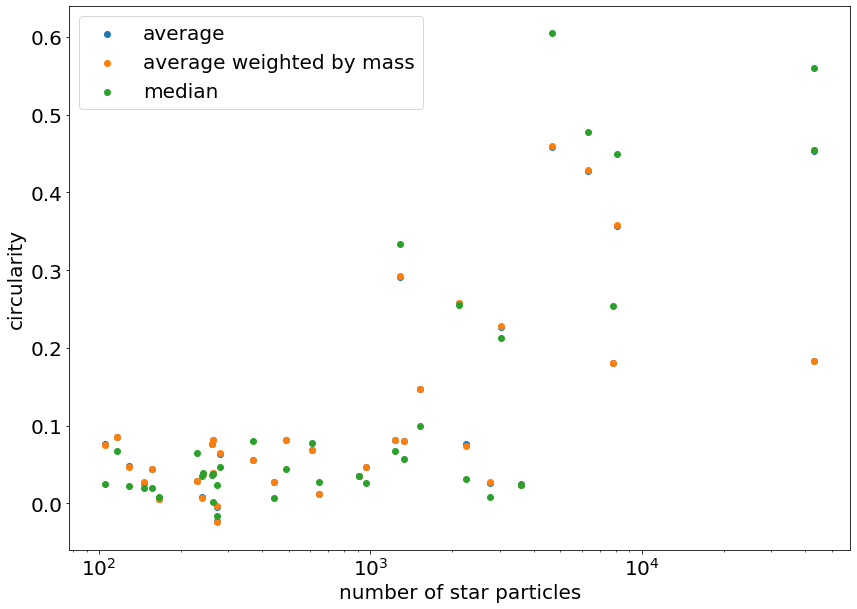

In [26]:
pl.figure(figsize=(14,10))

pl.scatter(npart, aveCirc, label='average')
pl.scatter(npart, aveMass, label='average weighted by mass')
pl.scatter(npart, medCirc, label='median')

pl.legend(loc='best')

pl.xscale('log')
pl.xlabel('number of star particles')
pl.ylabel('circularity')

Text(0, 0.5, 'cos theta')

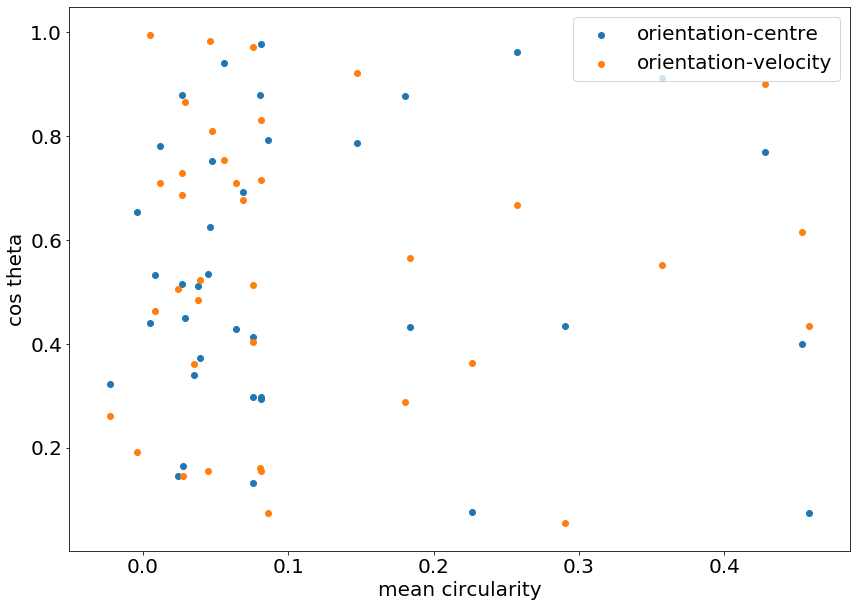

In [29]:
pl.figure(figsize=(14, 10))

pl.scatter(aveCirc, np.abs(CosCen), label='orientation-centre')
pl.scatter(aveCirc, np.abs(CosVel), label='orientation-velocity')

pl.legend(loc='best')

pl.xlabel('mean circularity')
pl.ylabel('cos theta')